<a href="https://colab.research.google.com/github/fernandovieira1/ML-e-DS-com-Python-de-A-a-Z/blob/master/PARTE_7_pos_lematizacao_stemizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [3]:
# https://spacy.io/api

In [4]:
%%capture
!python3 -m spacy download pt;

Marcação POS

In [5]:
# pos: part of the speach

In [6]:
pln = spacy.load('pt')
pln

In [7]:
documento = pln('Estou aprendendo linguagem natural, curso em curitiba')

In [8]:
type(documento)

spacy.tokens.doc.Doc

In [9]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
curitiba PROPN


Lematização e stemização

In [10]:
# Lemma: preceito
# Stem: radical

In [11]:
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
linguagem linguagem
natural natural
, ,
curso cursar
em em
curitiba curitiba


In [12]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')

In [13]:
for token in doc:
  print(token.lemma_)

encontrar
encontrar
encontrar
encontrar
cursar
cursar
cursar


In [14]:
# for criando uma lista
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [15]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [16]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [17]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
linguagem linguagem lingu
natural natural natur
, , ,
curso cursar curs
em em em
curitiba curitiba curitib


Carregamento de textos

In [18]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/intelig%C3%AAncia_artificial')

In [19]:
dados = dados.read()

In [20]:
dados_html = bs.BeautifulSoup(dados, 'lxml')

In [21]:
dados_html;

In [22]:
paragrafos = dados_html.find_all('p')

In [23]:
len(paragrafos)

105

In [24]:
paragrafos[0].text

'\n\t\tPáginas para editores conectados saiba mais\n'

In [25]:
conteudo = ''

for p in paragrafos:
  conteudo += p.text

In [26]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia 

In [27]:
conteudo = conteudo.lower()

Buscas em texto com spacy

In [28]:
pln = spacy.load('pt')

In [29]:
string = 'turing'

token_pesquisa = pln(string)

In [30]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab) # vocab: todo vocabulário da língua portuguesa 

matcher.add('SEARCH', None, token_pesquisa)

In [31]:
doc = pln(conteudo)

In [32]:
matches = matcher(doc)
matches

[(8661325627334373315, 3044, 3045),
 (8661325627334373315, 3054, 3055),
 (8661325627334373315, 3210, 3211),
 (8661325627334373315, 3215, 3216),
 (8661325627334373315, 3221, 3222),
 (8661325627334373315, 3284, 3285),
 (8661325627334373315, 3916, 3917),
 (8661325627334373315, 5191, 5192),
 (8661325627334373315, 8660, 8661),
 (8661325627334373315, 8796, 8797),
 (8661325627334373315, 8892, 8893),
 (8661325627334373315, 9009, 9010)]

In [33]:
doc[3044:3045] # localização da palavra

turing

In [34]:
doc[3044-5:3045+5] # vendo o contexto em que a palavra está inserida

uma contribuição prática de alan turing foi o que se chamou

In [35]:
from IPython.core.display import HTML

In [36]:
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

In [37]:
display(HTML(f'<h1>{string.upper()}</h1>'))

In [38]:
display(HTML(f"""<p><strong>Resultados encontrados:</strong>{len(matches)}</p>"""))

In [39]:
texto = ""
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string} </mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ..."""))

Extração de entidades nomeadas (NER)

In [40]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
sub-simbólico"?[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglater

In [41]:
from spacy import displacy

In [42]:
displacy.render(doc, style='ent', jupyter=True)

Nuvem de palavras e stopwords

In [43]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [44]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white', max_words=100, colormap=colormap)

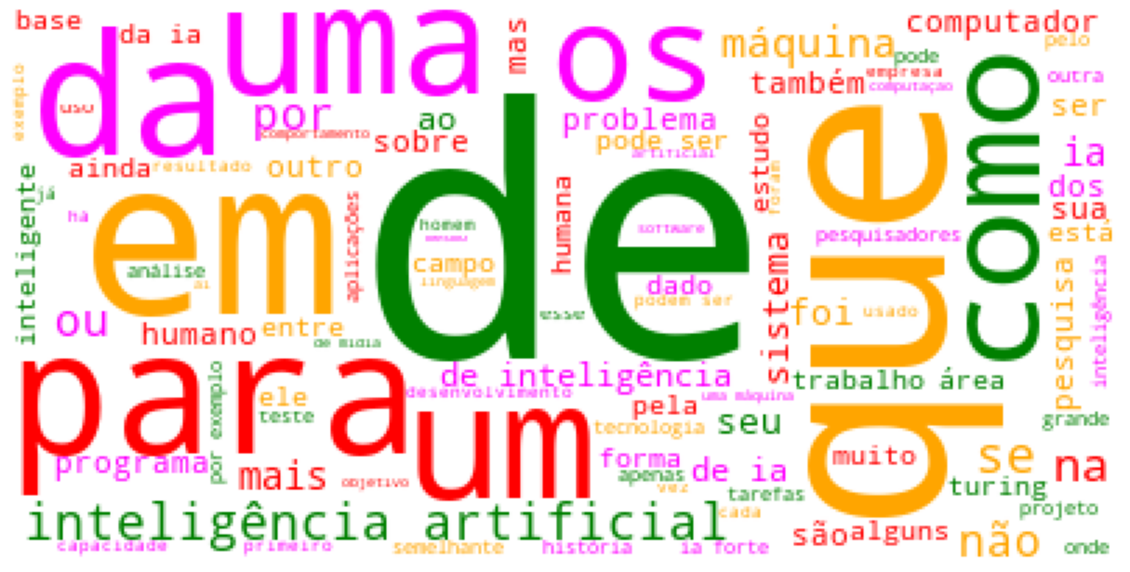

In [45]:
import matplotlib.pyplot as plt

cloud = cloud.generate(conteudo)

plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

plt.show()


In [46]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'faz', 'posição', 'três', 'onze', 'possivelmente', 'vários', 'pouco', 'nós', 'quanto', 'perto', 'próprio', 'aquelas', 'algumas', 'se', 'foste', 'obrigado', 'falta', 'esse', 'dezoito', 'eventual', 'catorze', 'ver', 'relação', 'demais', 'fez', 'ali', 'embora', 'próxima', 'forma', 'dezassete', 'fui', 'desde', 'todo', 'aqui', 'sem', 'teus', 'ontem', 'num', 'te', 'adeus', 'meu', 'sempre', 'quê', 'ao', 'nossa', 'cada', 'apoio', 'ter', 'sua', 'às', 'mesmo', 'novo', 'mil', 'tão', 'estás', 'nunca', 'nossos', 'primeiro', 'mês', 'vossas', 'uma', 'nesta', 'quarto', 'sei', 'último', 'tentar', 'puderam', 'seis', 'vocês', 'vindo', 'sim', 'dar', 'dentro', 'vos', 'novas', 'tens', 'fazemos', 'quinto', 'das', 'minha', 'os', 'portanto', 'baixo', 'nosso', 'agora', 'direita', 'lado', 'vossa', 'fará', 'fazes', 'posso', 'coisa', 'tente', 'certeza', 'pelo', 'veja', 'comprida', 'sexta', 'porquê', 'essa', 'parte', 'não', 'põem', 'teve', 'suas', 'oito', 'povo', 'da', 'nos', 'também', 'vós', 'estivestes', 'seus',

In [47]:
len(STOP_WORDS)

413

In [48]:
pln.vocab['como'].is_stop

True

In [49]:
token = pln(conteudo)
lista_token = []

for token in doc:
  lista_token.append(token.text)

In [50]:
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n', 'inteligência', 'artificial', '(', 'por', 'vezes', 'mencionada', 'pela', 'sigla', 'em', 'português', 'ia', 'ou', 'pela', 'sigla', 'em', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'é', 'a', 'inteligência', 'similar', 'à', 'humana', 'exibida', 'por', 'sistemas', 'de', 'software', ',', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico', '.', 'os', 'principais', 'pesquisadores', 'e', 'livros', 'didáticos', 'definem', 'o', 'campo', 'como', '"', 'o', 'estudo', 'e', 'projeto', 'de', 'agentes', 'inteligentes', '"', ',', 'onde', 'um', 'agente', 'inteligente', 'é', 'um', 'sistema', 'que', 'percebe', 'seu', 'ambiente', 'e', 'toma', 'atitudes', 'que', 'maximizam', 'suas', 'chances', 'de', 'sucesso', '.', 'andreas', 'kaplan', 'e', 'michael', 'haenlein', 'definem', 'a', 'inteligência', 'artificial', 'como', '“', 'uma', 'capacidade', 'do', 'sistema', 'para', 'interpretar', 'corretamente'

In [51]:
sem_stop = []

for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [52]:
len(sem_stop)

6602

In [53]:
print(sem_stop)

['\n\t\t', 'páginas', 'editores', 'conectados', 'saiba', '\n', 'inteligência', 'artificial', '(', 'mencionada', 'sigla', 'português', 'ia', 'sigla', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'a', 'inteligência', 'similar', 'humana', 'exibida', 'sistemas', 'software', ',', 'campo', 'estudo', 'acadêmico', '.', 'principais', 'pesquisadores', 'e', 'livros', 'didáticos', 'definem', 'o', 'campo', '"', 'o', 'estudo', 'e', 'projeto', 'agentes', 'inteligentes', '"', ',', 'agente', 'inteligente', 'percebe', 'ambiente', 'e', 'toma', 'atitudes', 'maximizam', 'chances', 'sucesso', '.', 'andreas', 'kaplan', 'e', 'michael', 'haenlein', 'definem', 'a', 'inteligência', 'artificial', '“', 'capacidade', 'interpretar', 'corretamente', 'dados', 'externos', ',', 'aprender', 'a', 'd', 'dados', 'e', 'utilizar', 'aprendizagens', 'atingir', 'objetivos', 'e', 'tarefas', 'específicas', 'adaptação', 'flexível”.[1', ']', 'john', 'mccarthy', ',', 'cunhou', 'o', 'termo', '1956', '(', '"', 'conferência',

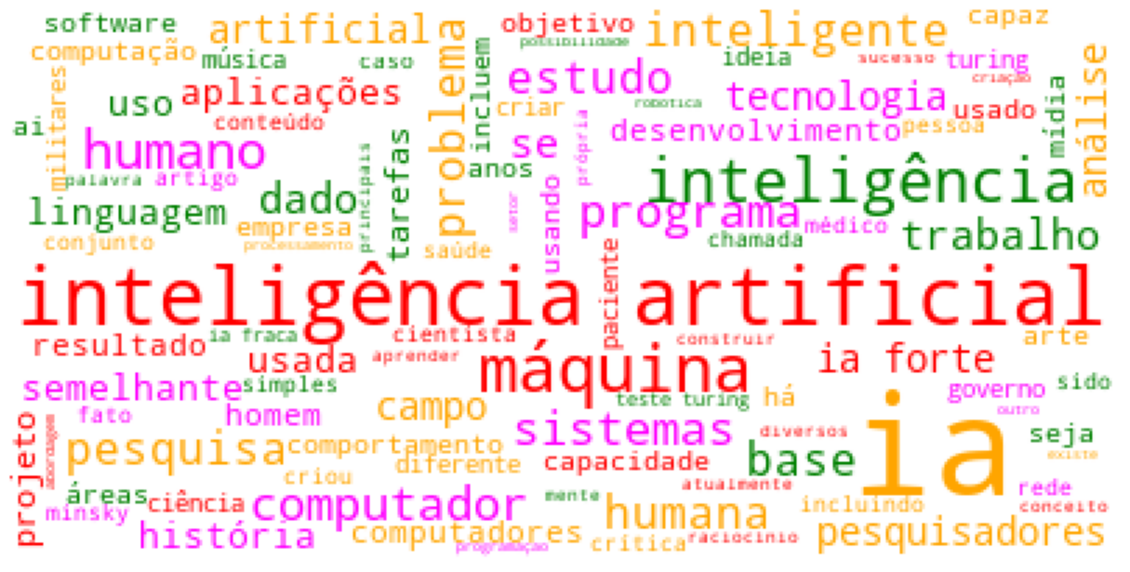

In [55]:
cloud = cloud.generate(' '.join(sem_stop))

plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

plt.show()